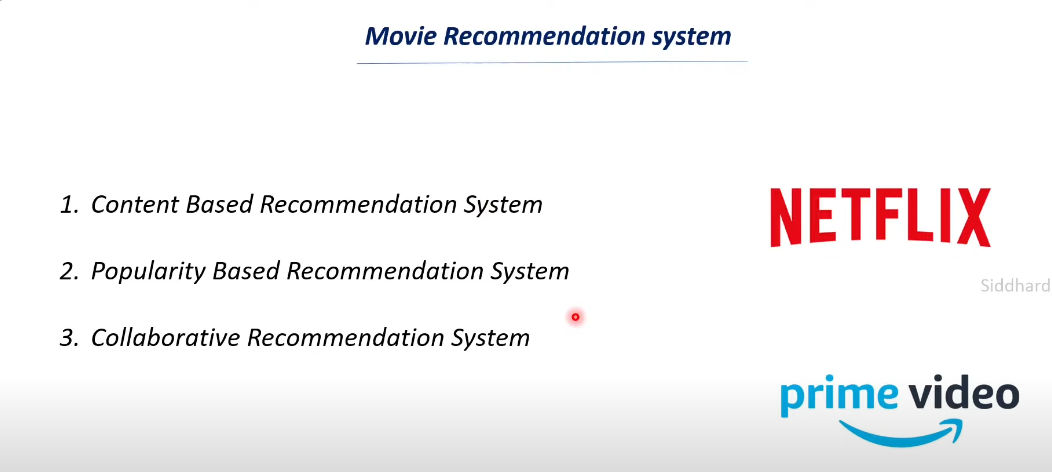

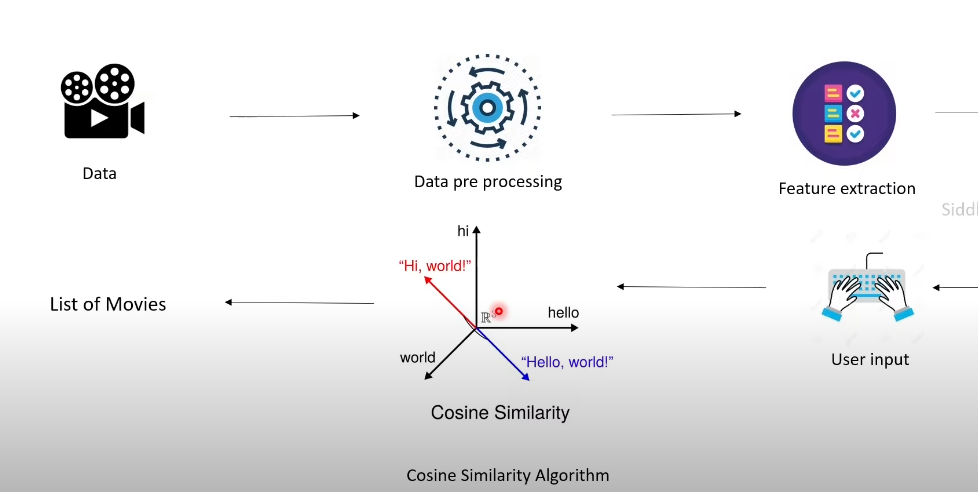

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import difflib
# This module is part of the Python Standard Library and provides classes and functions for comparing sequences, such as strings, and 
# finding similarities between them. It is commonly used for tasks like comparing files, detecting changes, and finding approximate matches.



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# used to import the cosine_similarity function from the sklearn.metrics.pairwise module in the Scikit-Learn library. This function is commonly
#  used in machine learning and data analysis to compute the cosine similarity between pairs of vectors.



Cosine Similarity

Definition: Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space. It is calculated as the cosine of<br> the angle between the vectors.

Range: The cosine similarity ranges from -1 to 1.

1 indicates that the vectors are identical.<br>
0 indicates orthogonality (no similarity).<br>
-1 indicates that the vectors are diametrically opposed.<br>

Usage in Machine Learning<br>
Text Similarity: Often used to measure similarity between text documents represented as vector embeddings (e.g., TF-IDF vectors).<br>
Clustering: Used in clustering algorithms to measure the similarity between data points.<br>
Recommendation Systems: Helps in finding similar items based on user preferences.


Data Collection and Pre-Processing

In [2]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv("D:/IMP Notes and code/Machine Learning/Projects/18 Movie Recommendation/movies.csv")

In [3]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
# number of rows and columns in the data frame

movies_data.shape

(4803, 24)

In [5]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [12]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

  # fillna() is a pandas method used to replace missing values (NaN) with a specified value.
# In this case, it replaces all missing values in the column with an empty string ('').


In [7]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [8]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [9]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [10]:
feature_vectors = vectorizer.fit_transform(combined_features)
# is used to transform text data into a numerical format that can be used by machine learning algorithms.

In [11]:
print(feature_vectors)

  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.24713765026964
  (4801, 17266)	0.28860981849329476
  (4801, 13835)	0.27870029291200094
  (4801, 13175)	0.28860981849329476
  (4801, 171

Cosine Similarity

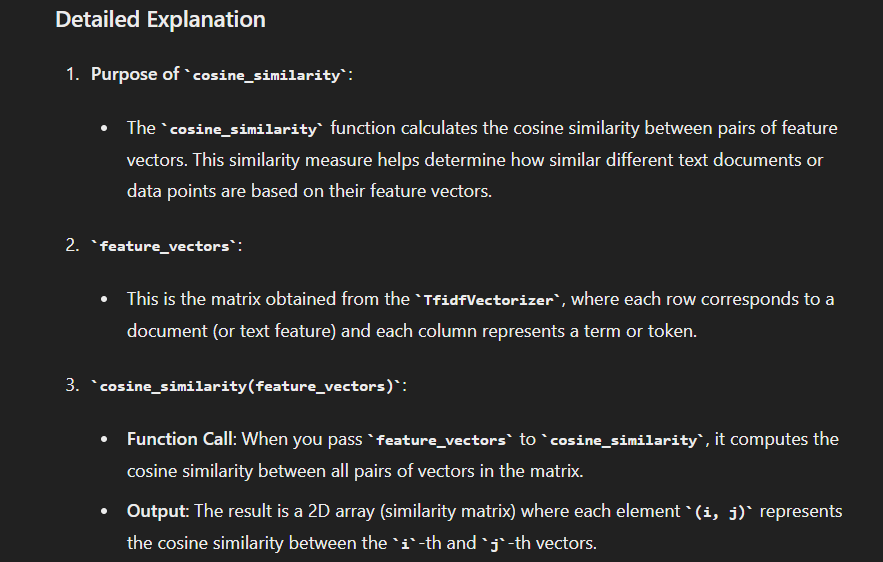

In [14]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [15]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [16]:
print(similarity.shape)

(4803, 4803)


Getting the movie name from the user

In [17]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

In [18]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

# movies_data['title']:
# This accesses the column named 'title' from the movies_data DataFrame.
# Result: It returns a pandas Series object containing the values from the 'title' column.

# .tolist():
# This is a method of pandas Series that converts the Series into a Python list.
# Purpose: It transforms the Series (which is a one-dimensional array) into a list of values.

# list_of_all_titles:
# This variable will hold the resulting list of all titles extracted from the 'title' column.


['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [19]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)  
# It is used to find titles in the list list_of_all_titles that closely match a given movie_name using the difflib 
print(find_close_match)

['Shame']


difflib.get_close_matches:

difflib is a standard Python library that provides classes and functions for comparing sequences.

get_close_matches is a function in the difflib module that finds the best matches for a given word or sequence from a list of possibilities.

Syntax: difflib.get_close_matches(word, possibilities, n=3, cutoff=0.6)<br>
word: The word to find close matches for.<br>
possibilities: A list of possible matches.<br>
n: (Optional) The maximum number of close matches to return. Default is 3.<br>
cutoff: (Optional) A float in the range [0, 1] which specifies the threshold for considering matches. Default is 0.6.<br>

movie_name:
This is a string variable containing the name of the movie you want to find matches for.

list_of_all_titles:
This is the list of movie titles extracted from the DataFrame, as explained in the previous steps.

find_close_match:
This variable will hold the list of titles from list_of_all_titles that are closest to the movie_name based on the similarity ratio.



In [21]:
# It  is used to select the best match from the list of close matches found by difflib.get_close_matches and print it
close_match = find_close_match[0]
print(close_match)

# find_close_match:
# This variable holds the list of titles that are closest matches to the movie_name, as found by difflib.get_close_matches.

# find_close_match[0]:
# This selects the first item from the list find_close_match.
# Since difflib.get_close_matches sorts the matches by similarity in descending order, the first item (find_close_match[0]) is the closest match.

# close_match:
# This variable is assigned the value of the closest match (i.e., the first item in find_close_match).


Shame


In [22]:
# finding the index of the movie with title

# It  is used to find the index of the movie that matches the close_match title in the movies_data
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

3430


movies_data:

This is a pandas DataFrame that contains the dataset with columns such as 'title' and 'index'.

movies_data.title == close_match:<br>
This creates a boolean Series where each entry is True if the corresponding 'title' in movies_data matches close_match and False otherwise.

movies_data[movies_data.title == close_match]:<br>
This filters the DataFrame to include only the rows where the 'title' matches close_match.

Result: A DataFrame with one row, the row where the 'title' matches close_match.

['index']:<br>
This selects the 'index' column from the filtered DataFrame.

.values:<br>
This converts the selected 'index' column into a NumPy array.

.values[0]:<br>
This accesses the first (and only) element in the NumPy array.<br>
Result: The index value of the movie with the title that matches close_match.

index_of_the_movie:<br>
This variable is assigned the index value of the movie that matches close_match.


In [23]:
# getting a list of similar movies
# It is used to compute and list the similarity scores of a closest movie (identified by its index_of_the_movie that we calculated above) with all
#  other movies in the dataset.

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.013148456309680017), (1, 0.0), (2, 0.0), (3, 0.016053783590117218), (4, 0.0), (5, 0.013620771326417163), (6, 0.016954667021200177), (7, 0.016907986193457875), (8, 0.011464047222825697), (9, 0.0), (10, 0.014788986325998163), (11, 0.0), (12, 0.0), (13, 0.119464690606776), (14, 0.011026975618959442), (15, 0.0800496072351183), (16, 0.038813099627564254), (17, 0.0), (18, 0.010604504123716855), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.029400931357167766), (24, 0.0030929030520746347), (25, 0.016539226523274223), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.013251665499825087), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.020667200688272977), (35, 0.011687593615036294), (36, 0.010531454538306487), (37, 0.013825089357179453), (38, 0.0), (39, 0.0), (40, 0.011760188416725369), (41, 0.0), (42, 0.011090682431907882), (43, 0.0), (44, 0.014172776780915263), (45, 0.12053164649209236), (46, 0.06955564436251246), (47, 0.0), (48, 0.0), (49, 0.08743063277262156), (50, 0.06706660414932046

similarity:<br>
This is a precomputed matrix (or array) where each element represents the similarity score between movies.<br>
If similarity is an n x n matrix, similarity[i][j] represents the similarity score between the i-th and j-th movies.

similarity[index_of_the_movie]:<br>
This retrieves the row in the similarity matrix corresponding to index_of_the_movie.

Result: A vector (array) of similarity scores between the movie at index_of_the_movie and all other movies.

enumerate(similarity[index_of_the_movie]):<br>
enumerate is a Python built-in function that adds a counter to an iterable.<br>
It returns an enumerate object which yields pairs of (index, similarity score).

list(enumerate(similarity[index_of_the_movie])):<br>
This converts the enumerate object into a list of tuples.<br>
Each tuple is of the form (index, similarity_score), where index is the index of another movie and similarity_score is the similarity between the <br>movie at index_of_the_movie and the other movie.

similarity_score:<br>
This variable holds the list of tuples containing the index and similarity score of the movie at index_of_the_movie with all other movies.

print(similarity_score):<br>
This prints the list of similarity scores to the console.


In [25]:
len(similarity_score)

4803

In [26]:
# sorting the movies based on their similarity score

# It  is used to sort the list of similarity scores in descending order, so that the most similar movies come first.
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(3430, 1.0000000000000002), (2951, 0.17934849604109634), (4152, 0.17727553262510248), (615, 0.16250249219296214), (4076, 0.1479366671325001), (588, 0.14544208505358494), (2086, 0.13943268674077558), (3530, 0.13754273549953053), (3583, 0.137534577021434), (3497, 0.13674279158431296), (2493, 0.13525799253974793), (2105, 0.13490120228177033), (2335, 0.13098340890884821), (1452, 0.13072481248666654), (2955, 0.1303329712797399), (4148, 0.12893948817526632), (941, 0.12392498737551241), (45, 0.12053164649209236), (4417, 0.12016929150702688), (13, 0.119464690606776), (4359, 0.11931527393093082), (1382, 0.11931432320972267), (1169, 0.11480237931024764), (2570, 0.11399227223106224), (3270, 0.11171542090055207), (1220, 0.10883791663733006), (3605, 0.10686391067917272), (1516, 0.10498898856392368), (1590, 0.10321907345106049), (1796, 0.10181187926031537), (3238, 0.10136295384341923), (1948, 0.0999906084066338), (283, 0.0992778718278495), (3750, 0.09891923556989123), (1560, 0.0988418363151038), (3

similarity_score:

This is a list of tuples, where each tuple contains:<br>
index: The index of another movie in the dataset.<br>
similarity_score: The similarity score between the movie at index_of_the_movie and the movie at index.

sorted(similarity_score, key = lambda x:x[1], reverse = True):<br>
sorted: This is a Python built-in function that returns a new sorted list from the items in an iterable.<br>
similarity_score: The list of tuples to be sorted.

key = lambda x: x[1]:<br>
This specifies a function to be used as the key for sorting.

lambda x: x[1] is a lambda function (an anonymous function) that takes a tuple x and returns its second element (x[1]), which is the similarity <br>score.

reverse = True:<br>
This sorts the list in descending order (from highest to lowest similarity score).

sorted_similar_movies:<br>
This variable is assigned the sorted list of tuples, where each tuple is of the form (index, similarity_score).<br>
The list is sorted in descending order based on the similarity scores.


In [27]:
# print the name of similar movies based on the index

# The code snippet print('Movies suggested for you : \n') followed by the for loop is used to print the titles of the top 30 movies that are most 
# similar to the given movie. 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Shame
2 . Inside Llewyn Davis
3 . Straight A's
4 . Money Train
5 . To Kill a Mockingbird
6 . Wall Street: Money Never Sleeps
7 . Home Alone 2: Lost in New York
8 . Don Jon
9 . Our Idiot Brother
10 . The Greatest
11 . The Immigrant
12 . 12 Years a Slave
13 . Blue Jasmine
14 . The Walk
15 . Romance & Cigarettes
16 . Coffee Town
17 . 13 Hours: The Secret Soldiers of Benghazi
18 . World War Z
19 . My Last Day Without You
20 . The Lone Ranger
21 . The Skeleton Twins
22 . TMNT
23 . 42
24 . Ramona and Beezus
25 . Howards End
26 . 8MM
27 . Sunshine Cleaning
28 . Bringing Out the Dead
29 . Atonement


i = 1:<br>
This initializes a counter i to 1, which will be used to number the suggested movies.

for movie in sorted_similar_movies::<br>
This starts a for loop that iterates over each tuple in the sorted_similar_movies list.<br>
Each movie in the loop is a tuple of the form (index, similarity_score).

index = movie[0]:<br>
This extracts the index of the movie from the tuple movie.

title_from_index = movies_data[movies_data.index==index]['title'].values[0]:

This retrieves the title of the movie corresponding to the extracted index:<br>
movies_data[movies_data.index==index] filters the DataFrame to keep only the row where the index matches the current index.

['title'] selects the 'title' column of the filtered DataFrame.

.values[0] extracts the first (and only) value from the 'title' column, which is the movie title.

if (i < 30)::<br>
This checks if the counter i is less than 30, ensuring that only the top 30 most similar movies are printed.

print(i, '.', title_from_index):<br>
This prints the current counter i, a period, and the movie title title_from_index.

i += 1:

This increments the counter i by 1 for the next iteration.


Movie Recommendation Sytem

In [28]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Batman
2 . Batman Returns
3 . Batman & Robin
4 . The Dark Knight Rises
5 . Batman Begins
6 . The Dark Knight
7 . A History of Violence
8 . Superman
9 . Beetlejuice
10 . Bedazzled
11 . Mars Attacks!
12 . The Sentinel
13 . Planet of the Apes
14 . Man of Steel
15 . Suicide Squad
16 . The Mask
17 . Salton Sea
18 . Spider-Man 3
19 . The Postman Always Rings Twice
20 . Hang 'em High
21 . Spider-Man 2
22 . Dungeons & Dragons: Wrath of the Dragon God
23 . Superman Returns
24 . Jonah Hex
25 . Exorcist II: The Heretic
26 . Superman II
27 . Green Lantern
28 . Superman III
29 . Something's Gotta Give


In [31]:
def plot_genre_distribution(data):
    genre_counts = data[data['liked_by_user'] == 1]['genre'].value_counts()
    genre_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Movies Liked by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.show()
